In [20]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import bovy_coords as coords
import os
import sys

In [21]:
!hostname

pcn-9-06


In [22]:
datapath="/mnt/home/bbhattarai/B3/"
freq_datapath="/mnt/home/bbhattarai/freq_data/"
plotpath="/mnt/home/bbhattarai/resonance_sweeping/plots/"

In [23]:
snapshot=302

In [24]:
freq_datafile="DiskActions"+str(snapshot)+".npy"

In [25]:
freqs= np.load(freq_datapath+freq_datafile)

# Reading the values from the frequency data

In [26]:
Jrdisk=freqs[0]
Jphidisk=freqs[1]
Jzdisk=freqs[2]
Trdisk=freqs[3]
Tphidisk=freqs[4]
Tzdisk=freqs[5]
Ordisk=freqs[6]
Ophidisk=freqs[7]
Ozdisk=freqs[8]
idd_from_freqs=freqs[9]

# Reading the snapshot data

In [27]:
pfile = open(datapath+'step'+str(snapshot)+'.p', 'rb')
idd,x,y,z,vx,vy,vz,mass=pickle.load(pfile)
discindx=(mass<1e-7)
idd_snapshots=idd[discindx]
x_select=x[discindx]
y_select=y[discindx]
z_select=z[discindx]

vx_select=vx[discindx]
vy_select=vy[discindx]
vz_select=vz[discindx]

# Converting to cylindrical coordinates

In [28]:
vr,vphi,vzz=coords.rect_to_cyl_vec(vx_select,vy_select,vz_select,x_select,y_select,z_select)
r,phi,zz=coords.rect_to_cyl(x_select,y_select,z_select)
#converting phi to degrees
phi=np.rad2deg(phi)


In [29]:
print("These are the ids obtained from the frequency data",len(idd_from_freqs))
print("These are the ids obtained from the snapshot  data",len(idd_snapshots))

These are the ids obtained from the frequency data 250980160
These are the ids obtained from the snapshot  data 250980160


# Loading all saved barangles

In [30]:
angle_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
datafilename="all_barangles_saved.ang"
ang_stored = open(angle_datapath+datafilename,'rb')
all_bangles=pickle.load(ang_stored)
print(len(all_bangles))

337


# Plotting x-y for Omega R

Plot generated and saved to file:  302_v_phi_vs_r_hexbin_rotated.jpg


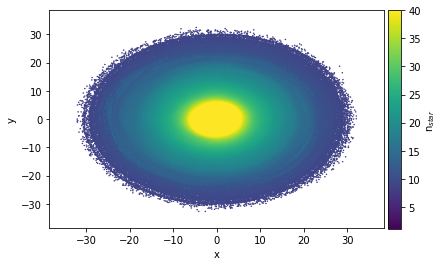

In [31]:
fig1=plt.figure()
ax=fig1.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
cb1=ax.hexbin(x_select,y_select,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,C=Ordisk,vmin=1,vmax=40)
ax.set_xlabel("x")
ax.set_ylabel("y")
cbar_ax = fig1.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig1.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"_v_phi_vs_r_hexbin_rotated.jpg"
#fig1.savefig(plotpath+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)
plt.show()

# v_phi vs vr 

Plot generated and saved to file:  302_v_phi_vs_r_hexbin_rotated.jpg


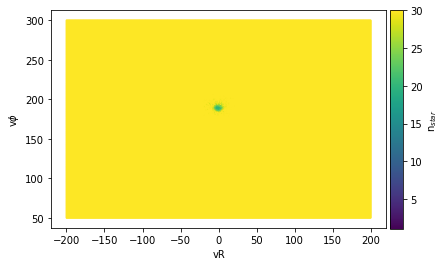

In [32]:
fig2=plt.figure()
ax=fig2.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
cb1=ax.hexbin(vr,vphi,extent=((-200,200,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=30,C=Ordisk)
ax.set_xlabel("vR")
ax.set_ylabel(r"v$\phi$")
cbar_ax = fig2.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig2.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"_v_phi_vs_r_hexbin_rotated.jpg"
#fig2.savefig(plotpath+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)
plt.show()